# Felipe Castillo
# Plot Assignment
# Data Preparation 
# 2/17/2022

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os 

os.chdir("C:\DataScience_DSC_540\Week9_10")

In [81]:
#met_data = pd.read_csv("MetObjects.csv")

In [80]:
#met_data.head(5)

In [82]:
candy_data = pd.read_csv("candyhierarchy2017.csv")

In [83]:
candy_data.head(5)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [84]:
# Setting two values that will be used later
candy_data_gender = candy_data.dropna(subset=['Q2: GENDER'])
candy_data_age = candy_data.dropna(subset=['Q3: AGE'])


In [85]:
candy_data_gender.head(4)

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


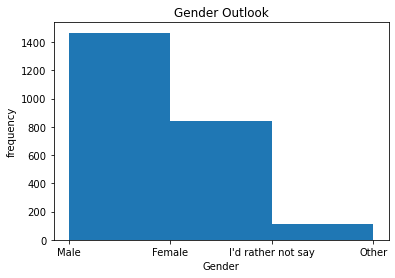

In [86]:
#making historgram 
plt.title("Gender Outlook")
plt.hist(candy_data_gender['Q2: GENDER'], bins=3)  
plt.ylabel('frequency')
plt.xlabel('Gender');

In [87]:
#taking age values that are unique and removing nosie

unique_age = []
for age in candy_data_age['Q3: AGE']:
    if age not in unique_age and age.isnumeric():
        unique_age.append(age)
print(unique_age)

['44', '49', '40', '23', '53', '33', '43', '56', '64', '37', '59', '48', '54', '36', '45', '25', '34', '35', '38', '58', '50', '47', '16', '52', '63', '65', '41', '27', '31', '61', '46', '42', '62', '29', '39', '32', '28', '69', '67', '30', '22', '26', '51', '70', '24', '18', '19', '57', '60', '66', '12', '55', '72', '21', '11', '9', '68', '20', '6', '10', '71', '90', '13', '312', '99', '7', '88', '74', '102', '17', '15', '8', '75', '14', '100', '76', '1000', '77', '73', '1', '4']


In [88]:
# find words with their count

#setting dic to empty 
agedic = {}
# Getting uique day values
for age in unique_age:
    
    #setting a current age values
    current_age = age
    count = 0
    #if an occurance of the uniuq value add counter
    for j in candy_data_age['Q3: AGE']:
        if(current_age ==  j and age != ''):
            count = count + 1
    # data has not numeric values filtering through this
    if(age != '' and age.isnumeric()):
        agedic[age] = count
        
    
        
print(agedic)
        
        
        
        
        
        
        
        

{'44': 76, '49': 69, '40': 92, '23': 9, '53': 57, '33': 75, '43': 86, '56': 46, '64': 17, '37': 89, '59': 24, '48': 64, '54': 36, '36': 79, '45': 75, '25': 19, '34': 90, '35': 77, '38': 76, '58': 34, '50': 71, '47': 63, '16': 4, '52': 50, '63': 20, '65': 13, '41': 74, '27': 45, '31': 45, '61': 20, '46': 55, '42': 79, '62': 20, '29': 27, '39': 69, '32': 68, '28': 37, '69': 5, '67': 6, '30': 62, '22': 11, '26': 23, '51': 41, '70': 8, '24': 16, '18': 10, '19': 3, '57': 25, '60': 31, '66': 9, '12': 9, '55': 32, '72': 6, '21': 14, '11': 7, '9': 4, '68': 8, '20': 12, '6': 2, '10': 3, '71': 6, '90': 2, '13': 6, '312': 1, '99': 1, '7': 2, '88': 1, '74': 1, '102': 1, '17': 5, '15': 8, '8': 2, '75': 3, '14': 2, '100': 2, '76': 2, '1000': 1, '77': 1, '73': 4, '1': 1, '4': 1}


<BarContainer object of 81 artists>

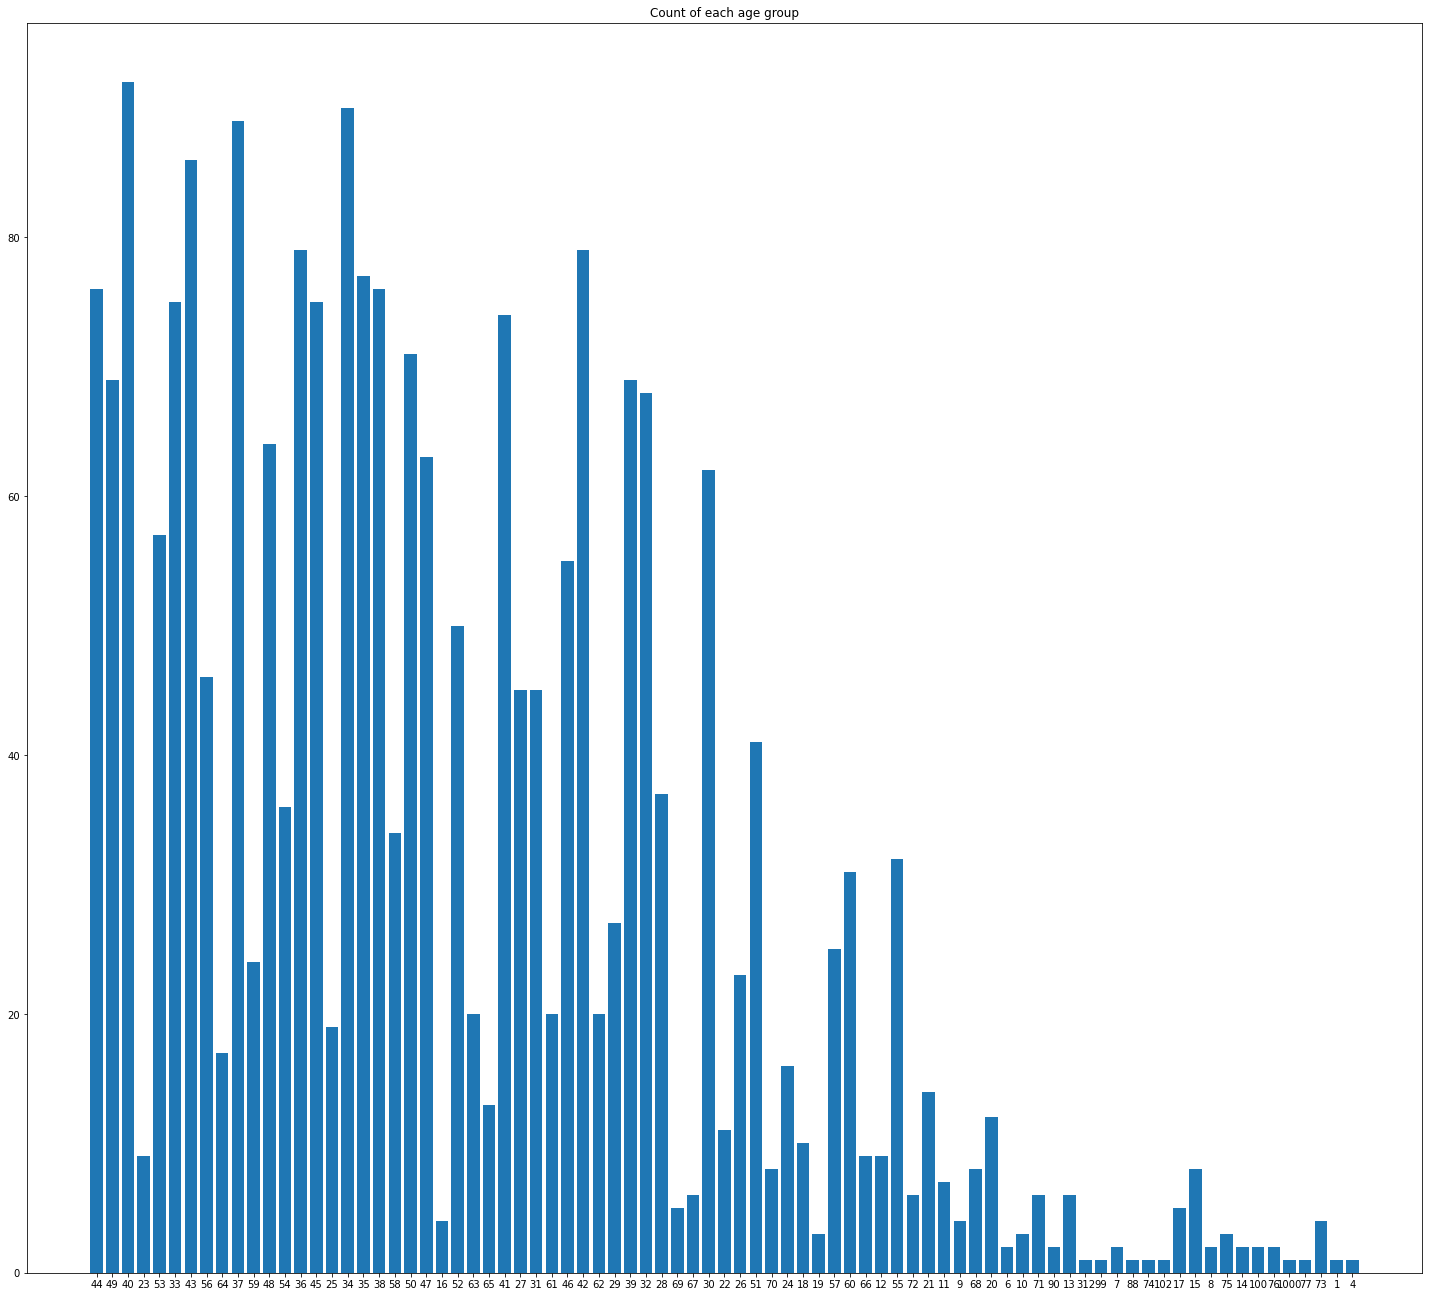

In [89]:
#Making a bar graph to see the age occcurance of the indvidauls



age = agedic.keys()
count = agedic.values()


plt.figure(figsize=(25, 23))
plt.title("Count of each age group")
plt.bar(age, count)

Using the same logic, can also be applicable to occurances of day. The logic is a for each that looks through occuraces and sets a dictionary.

In [90]:
#Droping na values
candy_data_day = candy_data.dropna(subset=['Q11: DAY'])

In [91]:
#same logic of dats
unique_day = []
for day in candy_data_day['Q11: DAY']:
    if day not in unique_day:
        unique_day.append(day)
print(unique_day)

['Sunday', 'Friday']


In [92]:
# find words with their count
# taking the same logic as before to see the occurance of different dates 
# same logic for age
daydic = {}
for day in candy_data_day['Q11: DAY']:
    current_day = day
    count = 0
    for j in candy_data_day['Q11: DAY']:
        if(current_day ==  j):
            count = count + 1
        daydic[current_day] = count

        
        
    
        
print(daydic)
        
        
        

{'Sunday': 644, 'Friday': 1091}


In [93]:
day = daydic.keys()
count_days = daydic.values()

print(count_days)

dict_values([644, 1091])


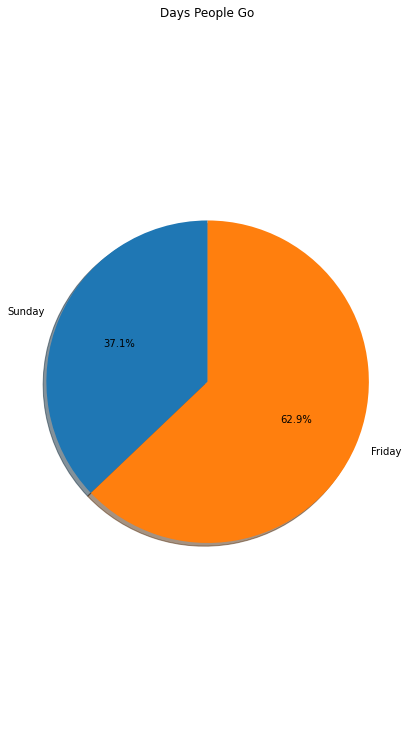

In [94]:
# Number of days where consumer goes can be important to see traffic data.


labels = day


fig = plt.figure(figsize=(10,10))
ax = fig.add_axes((0,0,.5,1))
plt.title("Days People Go")
ax.pie(count_days,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  
plt.show()